In [24]:
import scipy
from matplotlib import pyplot
from math import e, pi, log, sin

In [12]:
f1 = lambda x: e ** (-x**2) * (log(x) ** 2)
f2 = lambda x: 1 / (x**3 - 2*x - 5)
f3 = lambda x: x**5 * e**(-x) * sin(x)

In [13]:
def gen_n_points(a, b, n):
    return [a + (b - a) * i/(n-1) for i in range(n)]

In [14]:
def simpson_rule(x_vector, y_vector):
    result = 0
    for i, f_m in list(enumerate(y_vector))[1:-1:2]:
        a = x_vector[i-1]
        b = x_vector[i+1]

        f_a = y_vector[i-1]
        f_b = y_vector[i+1]

        result += (b - a) / 6 * (f_a + 4*f_m + f_b)

    return result

In [15]:
def composite_simpson_rule(x_vector, y_vector):
    summ = y_vector[0] + y_vector[-1]

    for i, y in list(enumerate(y_vector))[1:-1]:
        coeff = 4 if i % 2 == 1 else 2
        summ += coeff * y

    return summ * (x_vector[1] - x_vector[0]) / 3

In [16]:
def compare_results(function, a, b, n):
    x_points = gen_n_points(a, b, n)
    y_points = [function(x) for x in x_points]

    result1 = simpson_rule(x_points, y_points)
    result2 = composite_simpson_rule(x_points, y_points)
    [true_value, _] = scipy.integrate.quad(function, a, b)

    print(f"True value:        {true_value}")
    print(f"Simpson rule:      {result1}")
    print(f"Composite Simpson: {result2}")

### Function 1

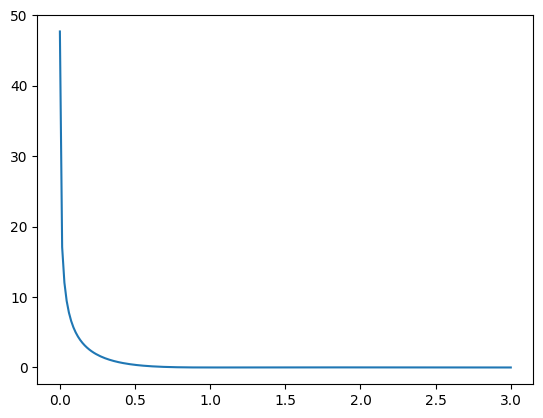

In [28]:
X = gen_n_points(0.001, 3, 201)
pyplot.plot(X, [f1(x0) for x0 in X])

In [17]:
compare_results(function=f1, a=0.002, b=2, n=150)

True value:        1.8388118835681182
Simpson rule:      1.8604991419655594
Composite Simpson: 1.8605791670502578


### Function 2

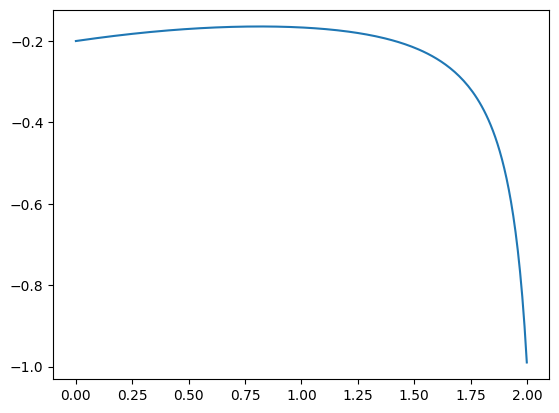

In [32]:
X = gen_n_points(0, 1.999, 201)
pyplot.plot(X, [f2(x0) for x0 in X])

In [30]:
compare_results(function=f2, a=0, b=2, n=150)

True value:        -0.4605015338467388
Simpson rule:      -0.44790298650715415
Composite Simpson: -0.45632578753462777


### Function 3

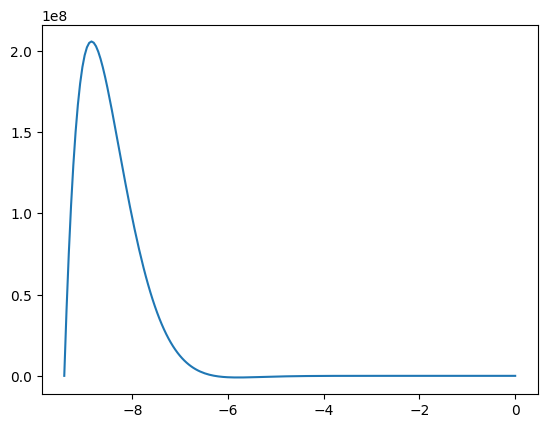

In [39]:
X = gen_n_points(-3*pi, 0, 200)
pyplot.plot(X, [f3(x0) for x0 in X])

In [34]:
compare_results(function=f2, a=-3*pi, b=0, n=150)

True value:        -0.5408721223779993
Simpson rule:      -0.5280588066737522
Composite Simpson: -0.5366018509946845
